In [0]:
#Input NPM
NPM = ""

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = [1706043361,1706040031 ]

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = ['https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c',
             'https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f',
             'https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9',
             'https://deepnotes.io/softmax-crossentropy#the-softmax-function'
             
             ]

## PR 3 Neural Network

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Layer Neural Network](#Soal-1)
    * [Soal 2 - Implementasi Loss Function](#Soal-2)
    * [Soal 3 - Implementasi Optimizer](#Soal-3)
    * [Soal 4 - Analisis Neural Network](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Neural Network adalah fashion.csv

* Berikut ketentuan pengerjaan PR 3:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya yang disebutkan pada cell di bawah

   - Berikan penjelasan singkat mengenai code yang Anda bangun

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import traceback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from google.colab import files
import io









### Dataset Fashion
* Pada PR ini Anda diminta untuk mengimplementasikan Neural Network untuk memprediksi kategori pada data fashion
* Data yang digunakan memiliki 785 atribut, yaitu pixel1 sampai pixel784 yang merepresentasikan pixel-pixel dari gambar fashion, dan kategori. Atribut yang akan diprediksi adalah kategori

In [27]:

from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv(io.BytesIO(uploaded['fashion-mnist.csv']))
with open('/content/drive/My Drive/Machine Learning/fashion-mnist.csv','r') as f:
  df = pd.read_csv(f)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kategori  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0         2       0       0       0  ...         0         0         0         0
1         9       0       0       0  ...         0         0         0         0
2         6       0       0       0  ...         0         0         0         0
3         0       0       0       0  ...         0         0         0         0
4         3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [29]:
# Pemisahan fitur dan target
features = df.drop(["kategori"], axis=1)
target = df["kategori"].values



pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       1  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...         0         0         0         0
59998       0       0       0       0  ...         0         0         0         0
59999       0       0       0       0  ...         0         0         0         0

[60000 rows x 784 columns]

In [0]:
# Preprocessing data

In [31]:
encoder = OneHotEncoder(categories='auto')
X, y = features, encoder.fit_transform(target.reshape(-1,1)).todense().astype(np.uint8)
X

pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       1  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...         0         0         0         0
59998       0       0       0       0  ...         0         0         0         0
59999       0       0       0       0  ...         0         0         0         0

[60000 rows x 784 columns]

## Soal 1 
### Layer Neural Network (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Activation Layer (Sigmoid dan Softmax) dan Dense Layer dari Neural Network

In [0]:
class Layer:
    """
    building block of a layer in creating a layer in NN
    """
    def __init__(self):
        pass
    
    def forward(self, _input):
        """
        takes input in shape of [batch, input_units]
        return output shape  of[batch, output_units]
        """
        return _input

    def backward(self, _input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        """
        return [np.dot(grad_output, _input)]

### Activation Layer

* Activation Layer yang diminta untuk diimplementasi meliputi Sigmoid dan Stable Softmax
* Activation Layer dapat didefinisikan seperti persamaan di bawah ini
  $$a^{[l]} = g(z^{[l]})$$ dimana g adalah non-linear function (misalnya tanh, relu, sigmoid) dan z adalah input

### Relu

In [0]:
class Relu(Layer):
    def __init__(self):
        pass
    
    def forward(self, _input):
        return np.maximum(0, _input)
    
    def backward(self, _input, grad_output):
        """
        relu gradient is a step function (1 if input > 0 else 0)
        """
        relu_grad = _input > 0
        print('relu grad:\n',relu_grad)
        print('return value:\n',[grad_output*relu_grad])
        return [grad_output*relu_grad]

In [0]:
relu = Relu()

In [45]:
# example of X with 5 features and 10 example
x = np.linspace(-1,1,2*5).reshape([5,2])
x.shape

(5, 2)

In [39]:
x

array([[-1.        , -0.77777778],
       [-0.55555556, -0.33333333],
       [-0.11111111,  0.11111111],
       [ 0.33333333,  0.55555556],
       [ 0.77777778,  1.        ]])

In [46]:
relu.forward(x)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.11111111],
       [0.33333333, 0.55555556],
       [0.77777778, 1.        ]])

In [47]:
# to compute its gradient we can just specify
# relu.backward(x, np.ones(x.shape))
# it will tell you that dx / d(what ever) = 1
# so that it will compute d (what ever) / d(relu) = (d relu / dx) * (dx / d(what ever))
# = d (what ever) / d(relu) = (d relu / dx) * 1
# = d (what ever) / d(relu) = (d relu / dx)
relu.backward(x, np.ones(x.shape))

relu grad:
 [[False False]
 [False False]
 [False  True]
 [ True  True]
 [ True  True]]
return value:
 [array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.]])]


[array([[0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 1.],
        [1., 1.]])]

relu grad:
 [[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False 

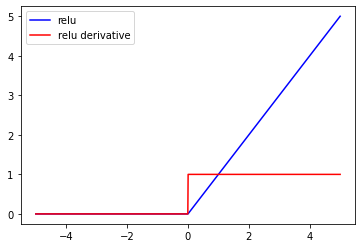

In [48]:
# Playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], relu.forward(x)[0], 'b', x[0], relu.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['relu', 'relu derivative'], loc='best')
plt.show()

### Sigmoid

In [0]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass

    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def derivative_sigmoid(self,x):
      return self.sigmoid(x)*(1-self.sigmoid(x))


    def forward(self, _input):
        # YOUR CODE HERE
        sigmoid_vectorize = np.vectorize(self.sigmoid)
        return sigmoid_vectorize(_input)
        raise NotImplementedError()
        
    def backward(self, _input, grad_output):
        # YOUR CODE HERE
       
        derivative_sigmoid_vectorize = np.vectorize(self.derivative_sigmoid)
        grad_input = derivative_sigmoid_vectorize(_input)
        return [grad_input]
        raise NotImplementedError()
        
        

In [64]:
sigmoid = Sigmoid()
np.testing.assert_almost_equal(sigmoid.forward(np.array([[-99,-99], [0,0],[1,1], [99,99]])), np.array([[0, 0], [0.5,0.5], [0.7310586,0.7310586], [1, 1]]))

np.testing.assert_almost_equal(sigmoid.backward(np.array([[-99,-99], [99,99]]), np.ones((2,2)))[0], np.array([[0,0], [0, 0]]))
np.testing.assert_almost_equal(sigmoid.backward(np.array([[1, 1], [0,0]]), np.ones((2,2)))[0], np.array([[0.1966119, 0.1966119], [0.25, 0.25]]))


grad output:
 [[1. 1.]
 [1. 1.]]
grad output:
 [[1. 1.]
 [1. 1.]]


In [0]:
#playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], sigmoid.forward(x)[0], 'b', x[0], sigmoid.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['sigmoid', 'sigmoid derivative'], loc='best')
plt.show()

### Softmax

In [66]:
np.exp(100)

2.6881171418161356e+43

In [67]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
softmax([0, 1, 5])

array([0.00657326, 0.01786798, 0.97555875])

In [69]:
softmax([0, 1000, 5000])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 0., nan, nan])

### Stable Softmax

* Masalah yang dapat dilihat pada softmax adalah hasil dari softmax tidak stabil ketika input yang diberikan terlalu besar (jarang terjadi tetapi mungkin dapat terjadi jika menggunakan relu activation function).
* Oleh karena itu, diperlukan softmax yang lebih stabil terhadap besarnya input yang diberikan.
* Untuk membuat stable softmax, kita dapat menggeser nilai maks mendekati 0

In [0]:
class Softmax(Layer):
    
    def __init__(self):
        pass

    def forward_util(self,x):
      x -= np.max(x)
      return np.exp(x)/(np.sum(np.exp(x)))

    def forward(self, _input):
        # YOUR CODE HERE
        #
        exponents = np.exp(_input - np.max(_input, axis=1, keepdims=True))
        result = exponents/np.sum(exponents, axis=1, keepdims=True)

     
        return result
        raise NotImplementedError()

    def backward(self, _input, grad_output):
        return [grad_output]

In [0]:
softmax = Softmax()
np.testing.assert_almost_equal(softmax.forward(np.array([[100],[1],[0]])), np.array([[1],[1],[1]]))
np.testing.assert_almost_equal(softmax.forward(np.array([[100,3000],[1,1],[0,1]])), np.array([[0,1],[0.5,0.5],[0.2689414, 0.7310586]]))

## Dense







* single dense layer untuk **forward propagation** dapat didefinisikan seperti di bawah ini 
$$z^{[l]} = W^{[l]}*a^{[l-1]} + b^{[l]} $$  dengan $a^{[l-1]}$ merupakan input untuk forward function (Anda dapat mendapatkannya dari parameter _input)


* single dense layer untuk **backward propagation** dapat didefinisikan seperti di bawah ini

    misalkan Anda sudah menghitung $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ dan Anda ingin menghitung $da^{[l-1]} , dW^{[l]}, db^{[l]}$

    yang perlu Anda lakukan hanyalah menghitung

    $da^{[l-1]}= \frac{\partial \mathcal{L} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial (W^{[l]}*a^{[l-1]} + b^{[l]}) }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} . W^{[l]}$

    $dW^{[l]}= \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial W^{[l]}} = $ ?

    $db^{[l]}= \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial b^{[l]}} = $ ?

    **REMINDER: NN yang kita gunakan memiliki shape [batch , input_unit ]. Oleh karena itu Anda harus menggunakan semua training example dalam suatu batch untuk menghitung gradien.**
    
    dengan $a^{[l-1]}$ dan $\frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ merupakan input untuk backward function (Anda dapat mendapatkannya dari parameter _input dan parameter grad_output)


In [0]:
class Dense(Layer):
    def __init__(self, input_shape, output_shape, weight_initializer='random'):

        if weight_initializer not in ['xavier','random']:
            raise ValueError('weight_initializer must be either xavier or random')

        if weight_initializer == 'random':
            self.weights = np.random.randn(input_shape, output_shape)*1e-2
        
        elif weight_initializer == 'xavier':
            self.weights = np.random.randn(input_shape, output_shape)*np.sqrt(2/(input_shape + output_shape))
        
        self.bias = np.random.randn(output_shape)
        print('weight:\n',self.weights)
        print('bias:\n',self.bias)
    

    def forward(self, _input):
        # YOUR CODE HERE
        return np.dot(_input,self.weights) + self.bias
        raise NotImplementedError()
        
    def backward(self, _input, grad_output):
        # YOUR CODE HERE
        grad_input = np.dot(grad_output,self.weights.T)
        grad_weights = np.dot(_input.T,grad_output)
        grad_bias = grad_output.mean(axis=0)*_input.shape[0]
        #self.weights = self.weights - self.learning_rate * grad_weights
        #self.biases = self.biases - self.learning_rate * grad_biases

        return [grad_input, grad_weights, grad_bias]
        raise NotImplementedError()
        
       

In [80]:
np.random.seed(3)
dense = Dense(2,2)
np.testing.assert_almost_equal(dense.forward(np.ones([3,2])), np.array([[-0.25853694, -0.36902881], [-0.25853694, -0.36902881],[-0.25853694, -0.36902881]]))

dense.weights = np.ones((2,2))
dense.bias = np.zeros(2)
backprop = dense.backward(np.array([[1,1]]), np.array([[1,1]]))
np.testing.assert_almost_equal(backprop[0], np.array([[2., 2.]]))
np.testing.assert_almost_equal(backprop[1], np.array([[1., 1.], [1., 1.]]))
np.testing.assert_almost_equal(backprop[2], np.array([1., 1.]))

assert dense.weights.shape == backprop[1].shape
assert dense.weights.shape[0] == backprop[0].shape[1]

weight:
 [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
bias:
 [-0.2773882  -0.35475898]


## Soal 2
### Loss Function (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Binary Log Loss dan Softmax Cross Entropy Loss

## Binary Log Loss

* Anda diminta untuk menghitung binary log loss function untuk m sample and gradiennya


In [0]:

gradient_history = []
def update_y_predict(y,alpha=1e-9):
  return min(max(y,alpha),1-alpha)

def calculate_sum_of_loss_util(y_true,y_predict,alpha=1e-9):
  return y_true*np.log(y_predict+alpha)

def calculate_gradient_util(y_true,y_predict):
  gradient = (y_predict-y_true)/(y_predict*(1-y_predict))
  gradient_history.append(gradient)
  return gradient




def binary_log_loss(y_true, y_pred):
    """
        input: y_true, y_pred (numpy array with shape [batch_size, 1])
        output: bin_log_loss (numpy float64)
                bin_log_loss_grad (numpy array with shape [batch_size, 1])
    """
    # YOUR CODE HERE

    alpha = 1e-9
    num_of_data = y_true.shape[0]
    y_true = y_true.astype(float)
    y_predict_vectorize = np.vectorize(update_y_predict)
    y_predict = y_predict_vectorize(y_pred)
    #y_predict = [min(max(x,alpha),1-alpha) for x in y_pred]
    print('ytrue:\n',y_true)
    print('y_pred:\n',y_predict)

    calculate_sum_of_loss_vectorize = np.vectorize(calculate_sum_of_loss_util)
    sum_of_loss = np.sum(calculate_sum_of_loss_vectorize(y_true,y_predict))
    calculate_gradient_vectorize = np.vectorize(calculate_gradient_util)
    
    bin_log_loss_grad = []
    for i in range(num_of_data):
      gradient = (y_pred[i] - y_true[i]) / ((y_pred[i])*(1-y_pred[i]))
      bin_log_loss_grad.append(gradient)
    
    bin_log_loss = -(sum_of_loss*1/num_of_data)


    

    return bin_log_loss, bin_log_loss_grad

    raise NotImplementedError()



    
    

# dont worry about this we will use it later
def binary_log_loss_with_sigmoid(layer_input_output_cache, y_true):
    return binary_log_loss(layer_input_output_cache[-1], y_true)

In [165]:
loss, grad = binary_log_loss(np.array([[1],[0]]),np.array([[1-1e-9],[0+1e-9]]))

np.testing.assert_almost_equal(loss, 0)
np.testing.assert_almost_equal(grad[0], -1)
np.testing.assert_almost_equal(grad[1], 1)

loss, grad = binary_log_loss(np.array([[1]]),np.array([[0.5]]))
np.testing.assert_almost_equal(loss, np.log(2))
assert grad[0][0] == -2

ytrue:
 [[1.]
 [0.]]
y_pred:
 [[9.99999999e-01]
 [1.00000000e-09]]
ytrue:
 [[1.]]
y_pred:
 [[0.5]]


## Softmax Cross Entropy Loss

* Rumus cross entropy loss untuk single example adalah sebagai berikut
$$L(y^{true}, y^{pred}) = - \sum\limits_{j=1}^k y_j^{true} log(y_j^{pred})$$

* Sedangkan rumus cross entropy loss untuk single batch adalah sebagai berikut

  $$L(y^{true}, y^{pred}) =  \frac{-1}{m} \sum\limits_{i=1}^m \sum\limits_{j=1}^k y_{i,j}^{true} log(y_{i,j}^{pred})$$ dimana m merupakan jumlah data dalam single batch

In [0]:


def calculate_cross_entropy_loss_utile(y_true,y_pred,alpha=1e-9):
  return np.sum(np.dot(y_true,np.log(y_pred+alpha)))


def softmax_cross_entropy(y_true, y_pred):
    # YOUR CODE HERE
  
    num_of_data = y_true.shape[0]
    calcluate_cross_entropy_vectorize = np.vectorize(calculate_cross_entropy_loss_utile)
    softmax_cross_entropy_loss = np.sum(calcluate_cross_entropy_vectorize(y_true,y_pred))/-num_of_data
    softmax_cross_entropy_grad = y_pred - y_true
    return softmax_cross_entropy_loss, softmax_cross_entropy_grad

# dont worry about this we will use it later
def softmax_cross_entropy_with_logits(layer_input_output_cache, y_true, softmax=Softmax()):
    logits = layer_input_output_cache[-1]
    y_pred = softmax.forward(logits)
    return softmax_cross_entropy(y_true, y_pred)

In [0]:
loss, _ = softmax_cross_entropy(np.array([[1,0],[0,1]]),np.array([[1-1e-9,0+1e-9],[1+1e-9,1-1e-9]]))
np.testing.assert_almost_equal(loss, 0)

loss, _ = softmax_cross_entropy(np.array([[1,0],[0,1],[0,1]]),np.array([[0.5,0.5],[0.5,0.5],[0.5,0.5]]))
np.testing.assert_almost_equal(loss, np.log(2))

loss, _ = softmax_cross_entropy(np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([[0.5,0.25,0.25],[0.5,0.25,0.25],[0.25,0.25,0.5]]))
np.testing.assert_almost_equal(loss, 0.9241962407465937)

## Soal 3
### Optimizer (5 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan update layer pada Momentum Optimizer

In [0]:
class Optimizer:
    def __init__(self, model, loss_func):
        self.model = model
        self.loss_func = loss_func
    
    
    def update_layer(self, layer, weight, bias):
        raise NotImplementedError

    # forward propagation    
    def _forward(self, _input):
        #cache the input and output to use later
        layer_input_output_cache = [_input]   
        
        #forward propagate for each layer
        for layer in self.model.layers:
            _input = layer.forward(_input)
            layer_input_output_cache.append(_input)
        
        return layer_input_output_cache
    
    def _backward(self, layer_input_output_cache, output_grad):
        # reverse loop
        for j in range(len(self.model.layers))[::-1]:

            layer = self.model.layers[j]

            # list of gradient
            D_list = layer.backward(layer_input_output_cache[j], output_grad)

            # update output grad and
            if len(D_list) > 1:
                # if contain weight and bias update this layer bias and weight
                [output_grad, weight, bias] = D_list
                self.update_layer(layer, weight, bias)
            else:
                output_grad = D_list[0]
    
    def fit(self, X_train, y_train ,X_val=None, y_val=None,n_epoch=100, batch_size=None):

        if batch_size is None:
            batch_size = X_train.shape[0]

        total_m_train= X_train.shape[0]

        
        use_val = X_val is not None
        if use_val:
            total_m_val = X_val.shape[0]

        # we are using the definition of epoch as 1 iteration to all training example
        history_train = []
        history_val = []

        for epoch in range(n_epoch):

            p_bar = tqdm(total=int(total_m_train/batch_size) + 1 if total_m_train%batch_size != 0 else 0)
            try:
                p_bar.set_description('epoch {}: {}/{} loss: inf'.format(epoch+1, 0, total_m_train))

                history_per_batch = []
                for i in (range(0, total_m_train, batch_size)):

                    #separate each set to minibatches
                    adjusted_batch_size = min(i+batch_size, total_m_train)
                    X_batch_train = X_train[i:adjusted_batch_size]
                    y_batch_train = y_train[i:adjusted_batch_size]


                    # forward propagate
                    layer_input_output_cache = self._forward(X_batch_train)

                    # compute its loss and grad
                    loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_train)
                    # report current progress
                    history_per_batch.append(loss)

                    p_bar.set_description('epoch {}: {}/{} loss: {:4f}'.format(epoch+1, adjusted_batch_size, total_m_train, loss))
                    p_bar.update(1)
                    
                    # backward propagation
                    self._backward(layer_input_output_cache, output_grad)
                history_train.append(history_per_batch)

                train_loss_mean = np.mean(history_per_batch)
                val_loss_mean = None

                if use_val:
                    history_per_batch = []
                    for i in (range(0, total_m_val, batch_size)):

                        #separate each set to minibatches
                        adjusted_batch_size = min(i+batch_size, total_m_val)
                        X_batch_val = X_val[i:adjusted_batch_size]
                        y_batch_val = y_val[i:adjusted_batch_size]

                        # forward propagate
                        layer_input_output_cache = self._forward(X_batch_val)
                        loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_val)

                        history_per_batch.append(loss)
                    history_val.append(history_per_batch)

                    val_loss_mean = np.mean(history_per_batch)
                val_report = ''
                if val_loss_mean is not None:
                    val_report = 'val: {:4f}'.format(val_loss_mean)
                p_bar.close()
                time.sleep(0.2)
                print('\tmean epoch {} loss: train: {:4f}'.format(epoch+1, train_loss_mean),val_report)
                time.sleep(0.2)
            except Exception as e:
                p_bar.close()
                traceback.print_stack()
                raise Exception(e)
                

        return history_train, history_val

## Gradient Descent Optimizer

In [0]:
class GradientDescentOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
    
    def update_layer(self,layer, grad_weights, grad_bias):
        layer.weights = layer.weights - self.learning_rate * grad_weights
        layer.bias = layer.bias - self.learning_rate * grad_bias

## Momentum Optimizer

In [0]:
class MomentumOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4, beta=0.9):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
        self.beta = beta
        self.__reset_velocity()
    
    def __reset_velocity(self):
        self.velocity = {}
    
    def update_layer(self, layer, grad_weights, grad_bias):
        # initialize velocity to zero
        print(layer)
        if id(layer) not in self.velocity:
            self.velocity[id(layer)] = 0
        
        # YOUR CODE HERE

       

        self.velocity[id(layer)] *= self.beta
        self.velocity[id(layer)] += grad_weights*(1-self.beta)
        layer.weights -= self.velocity[id(layer)] * self.learning_rate
        layer.bias = layer.bias - self.learning_rate * grad_bias

In [200]:
dense = Dense(1,2)
dense.weights = np.array([[1, 0]])
dense.bias = np.array([[1, 0]])
mom = MomentumOptimizer(None, lambda x:x, learning_rate=0.1,beta=0.5)

mom.update_layer(dense,1,1)
expected_velocity = 0.5
expected_weight = np.array([[0.95, -0.05]])
np.testing.assert_almost_equal(dense.weights, expected_weight)
assert mom.velocity[id(dense)] == expected_velocity

mom.update_layer(dense,0,0)
expected_velocity = 0.25
expected_weight = np.array([[0.925, -0.075]])
np.testing.assert_almost_equal(dense.weights, expected_weight)
assert mom.velocity[id(dense)] == expected_velocity

weight:
 [[-0.00356271 -0.01743141]]
bias:
 [-0.59664964 -0.58859438]


TypeError: ignored

In [183]:
#Playground
dense_mom = Dense(1,1)
dense_gd = Dense(1,1)
dense_mom.weights = np.array([[1]])
dense_gd.weights = np.array([[1]])


mom = MomentumOptimizer(None, lambda x:x, learning_rate=1e-4)
gd = GradientDescentOptimizer(None, lambda x:x, learning_rate=1e-4)
gd_history = [1]
mom_history = [1]
velocities = []


# lets say in this part of training phase the gradient is spiky (sometimes 1 sometimes -1)
for k in range(10):
    for i in range(10-k):
        mom.update_layer(dense_mom,-1*(-1 if i%(k+2) else 1) , 1)
        gd.update_layer(dense_gd,-1*(-1 if i%(k+2) else 1) , 1)
        gd_history.append(dense_gd.weights[0][0])
        mom_history.append(dense_mom.weights[0][0])
    
# smooth part of the gradient
for i in range(15):
    mom.update_layer(dense_mom,-0.5/(i+1),1)
    gd.update_layer(dense_gd,-0.5/(i+1),1)
    gd_history.append(dense_gd.weights[0][0])
    mom_history.append(dense_mom.weights[0][0])

weight:
 [[0.00982367]]
bias:
 [-1.10106763]
weight:
 [[-0.01185047]]
bias:
 [-0.2056499]


TypeError: ignored

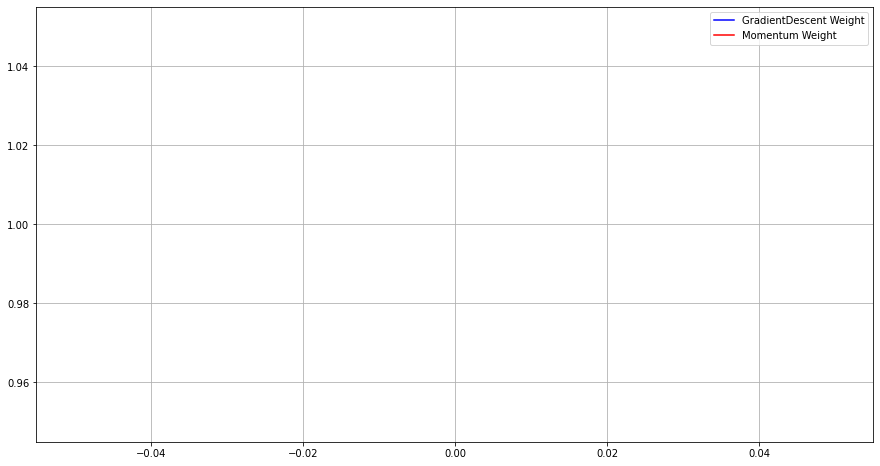

In [184]:
plt.figure(figsize=(15,8))
_iter = list(range(len(gd_history)))
plt.plot(_iter, gd_history, 'b', _iter, mom_history, 'r')
plt.grid()
plt.legend(['GradientDescent Weight', 'Momentum Weight'], loc='best')

## Sequential Model

In [0]:
class Sequential:
    def __init__(self):
        self.layers = []
    
    def append(self, layer):
        assert isinstance(layer, Layer)
        self.layers.append(layer)
    
    def predict_proba(self, X):
        _input = X
        for layer in self.layers:
            _input = layer.forward(_input)
        return _input

## Multi-Class Classification

In [0]:
def create_similar_model(random_state=42, adder=42):
    model = Sequential()
    np.random.seed(random_state+adder)
    model.append(Dense(X.shape[1], 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+2*adder)
    model.append(Dense(224, 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+3*adder)
    model.append(Dense(224, 10, 'xavier'))
    return model

In [0]:
model_1 = create_similar_model()
model_2 = create_similar_model()

In [0]:
gd = GradientDescentOptimizer(model_1, softmax_cross_entropy_with_logits, learning_rate=1e-1)
mom = MomentumOptimizer(model_2, softmax_cross_entropy_with_logits, learning_rate=1e-1)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, np.array(y), random_state=22)

In [0]:
history_train_gd, history_val_gd = gd.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

In [0]:
history_train_mom, history_val_mom = mom.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

In [0]:
history_mom_ravel_train = np.array(history_train_mom).ravel()
history_gd_ravel_train = np.array(history_train_gd).ravel()
total_iter = list(range(len(history_mom_ravel_train)))
plt.figure(figsize=(20,10))
plt.plot(total_iter, history_mom_ravel_train, 'b', total_iter, history_gd_ravel_train, 'r')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['Train Momentum Loss', 'Train Gradient Descent Loss'], loc='best')

In [0]:
history_mom_ravel_val = np.array(history_val_mom).ravel()
history_gd_ravel_val = np.array(history_val_gd).ravel()
total_iter = list(range(len(history_gd_ravel_val)))
plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(total_iter, history_mom_ravel_val, 'b', total_iter, history_gd_ravel_val, 'r')
plt.legend(['Val Momentum Loss', 'Val Gradient Descent Loss'], loc='best')

In [0]:
model_2.append(Softmax())
model_1.append(Softmax())

In [0]:
def predict(model, X):
    return np.argmax(model.predict_proba(X), axis=1)

In [0]:
y_val_label = encoder.inverse_transform(y_val).reshape(-1)

In [0]:
print(classification_report(y_val_label, predict(model_1, X_val)))

In [0]:
print(classification_report(y_val_label, predict(model_2, X_val)))

## Soal 4  
### Analisis Neural Network (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil klasifikasi neural network yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari penggunaan momentum optimizer dan Gradient descent optimizer yang didapatkan pada hasil klasifikasi di atas dan mengapa perbedaan tersebut bisa terjadi

### Jawaban

Momentum optimizer ternyata menghasilkan hasil yang baik dibandingkan Gradient Descent Optimizer. 

Namun kedua optimizer ini dipengaruhi oleh learning rate. Bisa jadi ketika kita salah men-set learning rate, Gradient Descent malah lebih baik dibandingkan Momentum